# Data Prep with Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the opsd_germany_daily.csv file and assigned it to df
df = pd.read_csv('opsd_germany_daily.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
def read_ospd_csv(csv):
    df = pd.read_csv(csv)
    return df

In [4]:
function_df = read_ospd_csv('opsd_germany_daily.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


### 1)
Convert date column to datetime format.

In [5]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [6]:
def convert_datetime(df, column):
    df[column] = pd.to_datetime(df[column])
    return df

In [7]:
function_df = convert_datetime(function_df, 'Date')
function_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


### 2)
Plot the distribution of each of your variables.

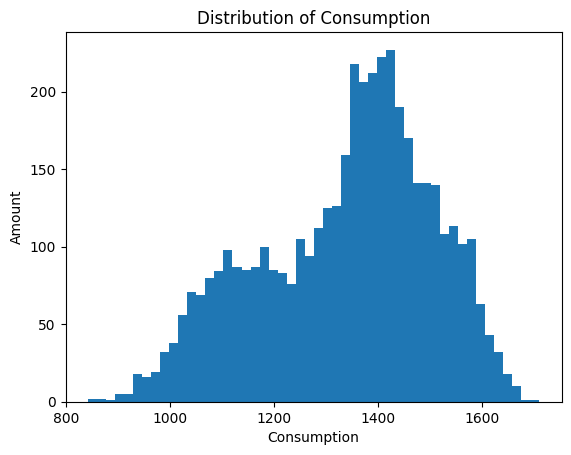

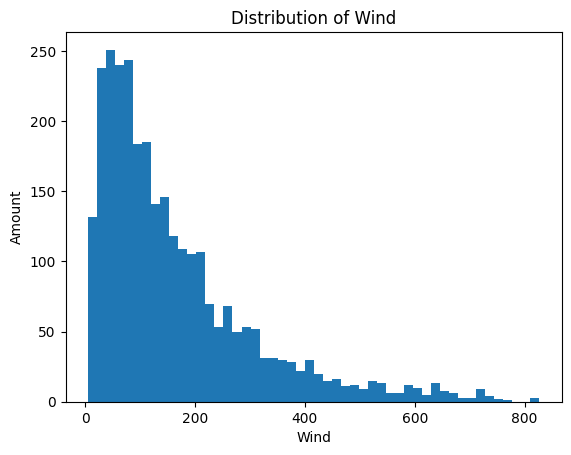

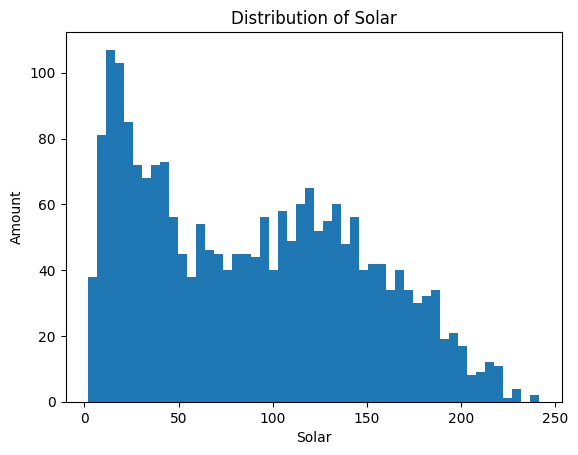

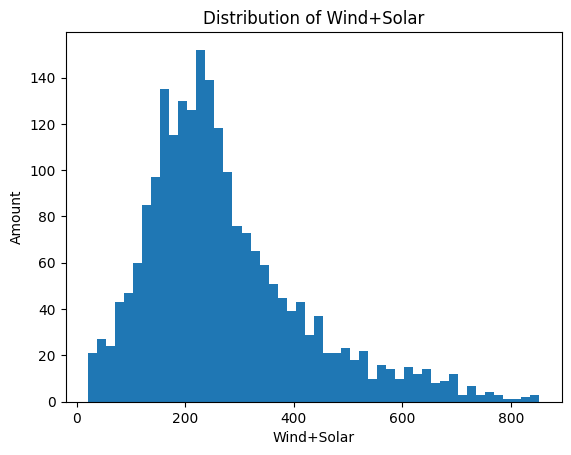

In [8]:
ignore = 'Date'
for col in df.columns:
    if col != ignore:
        plt.hist(df[col], bins=50)
        plt.xlabel(col)
        plt.ylabel('Amount')
        plt.title(f'Distribution of {col}')
        plt.show()

In [9]:
def distribution_plot(df, ignore=None):
    for col in df.columns:
        if col != ignore:
            plt.hist(df[col], bins=50)
            plt.xlabel(col)
            plt.ylabel('Amount')
            plt.title(f'Distribution of {col}')
            plt.show()

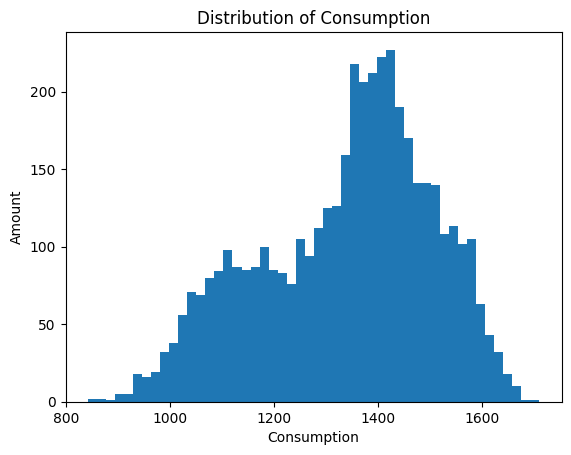

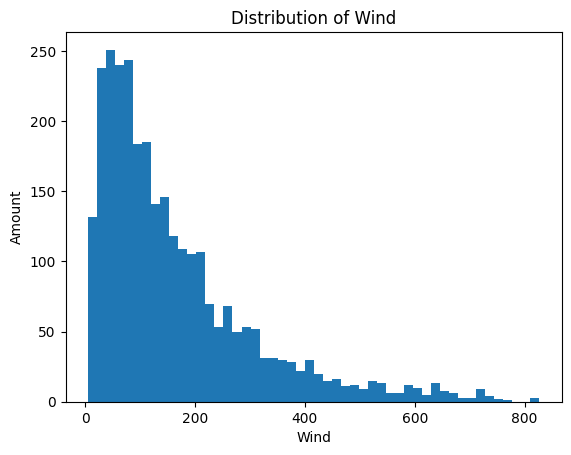

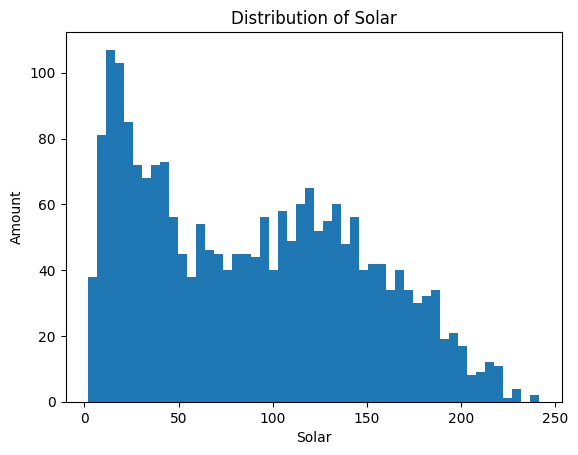

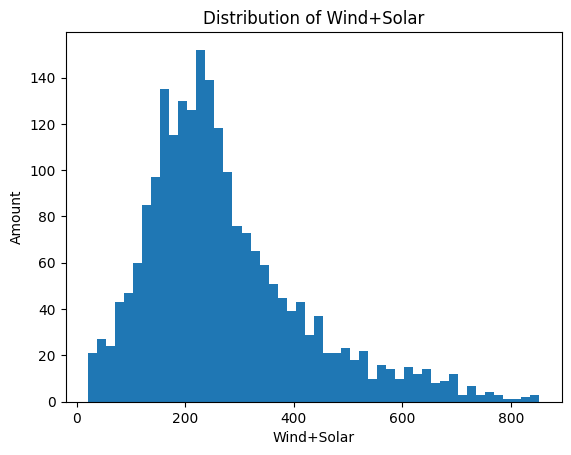

In [10]:
distribution_plot(function_df, ignore = 'Date')

### 3) 
Set the index to be the datetime variable.

In [11]:
df = df.set_index('Date').sort_values(by = 'Date')
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [12]:
def index_and_sort(df, column):
    df = df.set_index(column).sort_values(by = column)
    return df

In [13]:
function_df = index_and_sort(function_df, 'Date')
function_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### 4) 
Add a month and a year column to your dataframe.

In [14]:
df['Month'] = df.index.month_name()
df.head()

,Consumption,Wind,Solar,Wind+Solar,Month
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,NaN,January


In [15]:
def month_col(df, col_name):
    df[col_name] = df.index.month_name()
    return df

In [16]:
function_df = month_col(function_df, 'Month')
function_df.head()

,Consumption,Wind,Solar,Wind+Solar,Month
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,NaN,January


In [17]:
df['Year'] = df.index.year
df.head()

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


In [18]:
def year_col(df, col_name):
    df[col_name] = df.index.year
    return df

In [19]:
function_df = year_col(function_df, 'Year')
function_df.head()

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


### 5) 
Fill any missing values.

In [20]:
df.Wind = df.Wind.bfill()
df.Solar = df.Solar.bfill()
df['Wind+Solar'] = df['Wind+Solar'].bfill()
df.head()

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,January,2006
2006-01-02,1380.521,48.709,6.587,234.052,January,2006
2006-01-03,1442.533,48.709,6.587,234.052,January,2006
2006-01-04,1457.217,48.709,6.587,234.052,January,2006
2006-01-05,1477.131,48.709,6.587,234.052,January,2006


In [21]:
def fill_missing_values(df, columns):
    for col in columns:
        df[col] = df[col].bfill()
    return df

In [22]:
function_df = fill_missing_values(function_df, columns = ('Wind', 'Solar', 'Wind+Solar'))
function_df.head()

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,January,2006
2006-01-02,1380.521,48.709,6.587,234.052,January,2006
2006-01-03,1442.533,48.709,6.587,234.052,January,2006
2006-01-04,1457.217,48.709,6.587,234.052,January,2006
2006-01-05,1477.131,48.709,6.587,234.052,January,2006


### 6) 
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.